### === Task ===

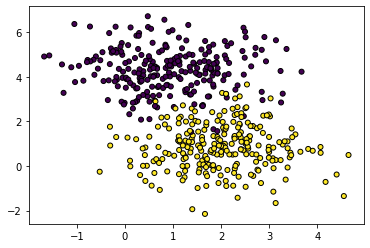

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

Cost at iteration 0 24.26015131959808
Cost at iteration 100 21.61957882241187
Cost at iteration 200 19.670094115327352
Cost at iteration 300 17.76196625387036
Cost at iteration 400 16.828038000433068
Cost at iteration 500 15.032355891287594
Cost at iteration 600 14.093906527890352
Cost at iteration 700 12.745242530807014
Cost at iteration 800 13.305100549781102
Cost at iteration 900 11.619458184548858
Cost at iteration 1000 13.12245181384937
Cost at iteration 1100 11.195130183212864
Cost at iteration 1200 11.360373358599535
Cost at iteration 1300 10.225553008920805
Cost at iteration 1400 10.125842108664658
Cost at iteration 1500 3.96998041600236
Cost at iteration 1600 9.484136221104022
Cost at iteration 1700 9.463110442708285
Cost at iteration 1800 9.370325282090857
Cost at iteration 1900 10.12707308028223
Cost at iteration 2000 7.7147125493566024
Cost at iteration 2100 9.321197663672766
Cost at iteration 2200 8.735141468497499
Cost at iteration 2300 7.54602001356933
Cost at iteration 

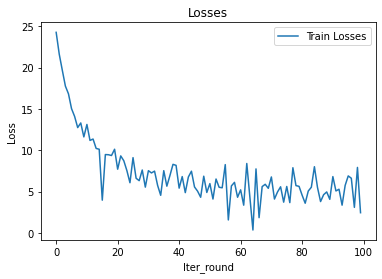

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1) 
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1) 


#1, 2
class LogisticRegression:
    def __init__(self, alpha = 0.0001, max_iter = 10000, loss_old = 10000):
        self.alpha = alpha
        self.max_iter = max_iter  
        self.loss_old = loss_old      
 
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])   
        self.loss = []                       
        
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0])                    
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]         
            cost, grad = self.gradient(batch_X, batch_y)   
            
            if i % 100 == 0:                                         
                print(f"Cost at iteration {i}", cost)
                self.loss.append(cost)                               
            self.w = self.w - self.alpha * grad

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)                
        error = h - y         
        
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))   
        grad = np.dot(X.T, error)
        return cost, grad          
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(np.arange(len(self.loss)) , self.loss, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("Iter_round")
        plt.ylabel("Loss")
        plt.legend()


# 3 plot
model = LogisticRegression() 
model.fit(X_train, y_train)

yhat = model.predict(X_test)
model.plot()

In [42]:
#4 
class classification_report :
    def __init__(self, actual, predict):
        self.actual = actual
        self.predict = predict
        
        self.TP = sum((self.actual == 1) & (self.predict == 1))            
        self.TN = sum((self.actual == 0) & (self.predict == 0))
        self.FN = sum((self.actual == 1) & (self.predict == 0))
        self.FP = sum((self.actual == 0) & (self.predict == 1))
        
    def accuracy(self):
        self.accuracy = (self.TP + self.TN)/ (self.TP + self.TN + self.FN + self.FP)
        return self.accuracy
    
    def recall(self):
        self.recall = self.TP/ (self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = self.TP/ (self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1


In [44]:
# วิธีเรียก fun ของ class             # (actual, predict)
class_report = classification_report(y_test, yhat)

print(f"Accuracy: ", class_report.accuracy())
print(f"Recall: ", class_report.recall())
print(f"Precision: ", class_report.precision())
print(f"F1:", class_report.f1())

# call attribute ของ class
print(class_report.TP)
print(class_report.TN)
print(class_report.FN)
print(class_report.FP)

Accuracy:  0.96
Recall:  0.9382716049382716
Precision:  0.987012987012987
F1: 0.9620253164556961
76
68
5
1


In [48]:
from sklearn.metrics import average_precision_score
print("Average precision score : ")
print(average_precision_score(y_test, yhat))

Average precision score : 
0.959419592752926


In [49]:
from sklearn.metrics import classification_report
print("Classificaiton report :")
print(classification_report(y_test, yhat))

Classificaiton report :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.99      0.94      0.96        81

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

